# Kaggle Challenge : Facebook Recruiting IV: Human or Robot?

#### Description of the Challenge
Predict if an online bid is made by a machine or a human

In this competition, you'll be chasing down robots for an online auction site. Human bidders on the site are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting.



In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions. Their attempt at building a model to identify these bids using behavioral data, including bid frequency over short periods of time, has proven insufficient. 

The goal of this competition is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity. 

The data in this competition comes from an online platform, not from Facebook.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Model building
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix, precision_score, recall_score

# Set max colwidth to 500
pd.set_option('max_colwidth', 500)

### Load Data

In [6]:
# Import train data
train = pd.read_csv(r"C:\Users\Niks\Downloads\kaggle2 Facebook bot vs Human\train.csv")
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [7]:
# Import test data
test = pd.read_csv(r"C:\Users\Niks\Downloads\kaggle2 Facebook bot vs Human\test.csv")
test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [8]:
# Import bid data
bids = pd.read_csv(r"C:\Users\Niks\Downloads\kaggle2 Facebook bot vs Human\bids.csv")
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [9]:
# Checking dataframes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
bidder_id          2013 non-null object
payment_account    2013 non-null object
address            2013 non-null object
outcome            2013 non-null float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
bidder_id          4700 non-null object
payment_account    4700 non-null object
address            4700 non-null object
dtypes: object(3)
memory usage: 110.2+ KB


In [11]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
bid_id         int64
bidder_id      object
auction        object
merchandise    object
device         object
time           int64
country        object
ip             object
url            object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [12]:
# Checking bot percentage in data
train["outcome"].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [13]:
# Creating a copy of train, test and bids dataframe
train2 = train.copy()
test2 = test.copy()
bids2 = bids.copy()

#### Feature Engineering

In [14]:
# Count number of bids, device, country, ip merchandise, auction, url used by bidder
bids2_count = bids2.groupby("bidder_id")["bid_id","device","country","ip","merchandise","auction","url"].nunique()
bids2_count.reset_index(inplace=True)
bids2_count.head()

,bidder_id,bid_id,device,country,ip,merchandise,auction,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,2,1,1,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,8,1,10,1,13,7


In [15]:
# Prefixing column name with "count_"
bids2_count = bids2_count.add_prefix("count_")
bids2_count.rename(columns={"count_bidder_id":"bidder_id"},inplace=True)
bids2_count.head()


,bidder_id,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,2,1,1,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,8,1,10,1,13,7


In [16]:
# Merging the bids2_count dataframe with train dataframe
train2_merged = pd.merge(train2,bids2_count,on="bidder_id",how="left")
train2_merged.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0


In [17]:
# Merging the bids2_count dataframe with test dataframe
test2_merged = pd.merge(test2,bids2_count,on="bidder_id",how="left")
test2_merged.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0


In [18]:
# Checking null values in train dataset
train2_merged.isnull().sum()

bidder_id             0
payment_account       0
address               0
outcome               0
count_bid_id         29
count_device         29
count_country        29
count_ip             29
count_merchandise    29
count_auction        29
count_url            29
dtype: int64

In [19]:
# Impute numeric columns with 0
count_list=["count_device","count_country","count_ip","count_merchandise","count_auction","count_url"]

for col in count_list:
    train2_merged[col].fillna(0, inplace=True)
    test2_merged[col].fillna(0, inplace=True)

In [20]:
# Checking if bidder had bid for mobile or sporting goods
merchlist = ['mobile', 'sporting goods']
bidmerch = bids2[bids2["merchandise"].isin(merchlist)][["bidder_id","merchandise"]]
bidmerch.drop_duplicates(inplace=True)

def prefmerch(bidder):
    if(bidder in bidmerch["bidder_id"].values):
        return 1
    else:
        return 0

#### Feature engineering

In [21]:
# Create a new column 'prefmerch'
# 1-bid for mobile or sporting goods else 0
train2_merged['prefmerch'] = train2_merged["bidder_id"].apply(prefmerch)
train2_merged['prefmerch'].unique()

array([0, 1], dtype=int64)

In [22]:
# Create a new column 'prefmerch'
# 1-bid for mobile or sporting goods else 0

test2_merged['prefmerch'] = test2_merged["bidder_id"].apply(prefmerch)
test2_merged['prefmerch'].unique()

array([0, 1], dtype=int64)

In [23]:
# Create a copy of test dataset before encoding.
test_merged2 = test2_merged.copy()
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0


In [24]:
# Encode the columns in train and test

cols2encode = ['bidder_id', 'payment_account', 'address']
for col in cols2encode:
    print(col)
    encode = LabelEncoder()
    train2_merged[col] = encode.fit_transform(train2_merged[col])
    test2_merged[col] = encode.fit_transform(test2_merged[col])
    
train2_merged.head()

bidder_id
payment_account
address


,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,1158,823,1362,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,0
1,773,1535,1479,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,0
2,218,619,954,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1
3,622,314,506,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,613,769,261,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,0


In [25]:
# Numeric and NonNumeric columns
numcols = list(train2_merged.select_dtypes(exclude="object").columns)
nonnumcols = list(train2_merged.select_dtypes(include="object").columns)

# Fill missing values
for col in numcols:
    train2_merged[col].fillna(0, inplace=True)

for col in nonnumcols:
    train2_merged[col].fillna("NA", inplace=True)

In [26]:
# Numeric and NonNumeric columns
numcols = list(test2_merged.select_dtypes(exclude="object").columns)
nonnumcols = list(test2_merged.select_dtypes(include="object").columns)

# Fill missing values
for col in numcols:
    test2_merged[col].fillna(0, inplace=True)

for col in nonnumcols:
    test2_merged[col].fillna("NA", inplace=True)

In [27]:
# % Missing value of columns
100*(train2_merged.isnull().sum()/len(train2_merged.index))

bidder_id            0.0
payment_account      0.0
address              0.0
outcome              0.0
count_bid_id         0.0
count_device         0.0
count_country        0.0
count_ip             0.0
count_merchandise    0.0
count_auction        0.0
count_url            0.0
prefmerch            0.0
dtype: float64

In [28]:
# % Missing value of columns
100*(test2_merged.isnull().sum()/len(test2_merged.index))

bidder_id            0.0
payment_account      0.0
address              0.0
count_bid_id         0.0
count_device         0.0
count_country        0.0
count_ip             0.0
count_merchandise    0.0
count_auction        0.0
count_url            0.0
prefmerch            0.0
dtype: float64

Checking if there are more bots for any particular merchandise

In [150]:
train2_merged.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,1158,823,1362,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,0
1,773,1535,1479,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,0
2,218,619,954,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1
3,622,314,506,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,613,769,261,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,0


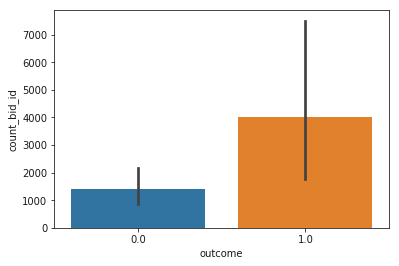

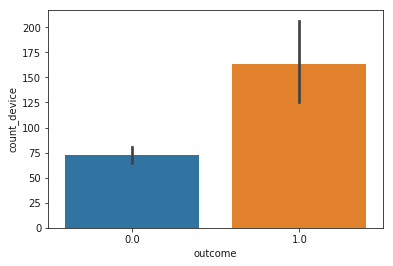

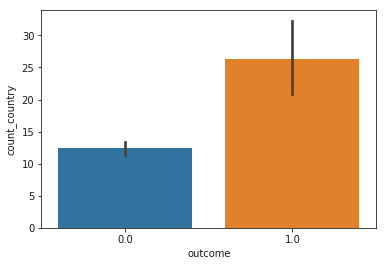

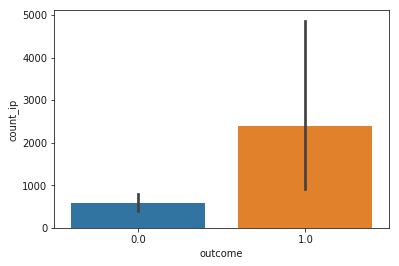

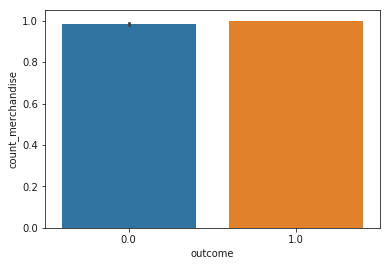

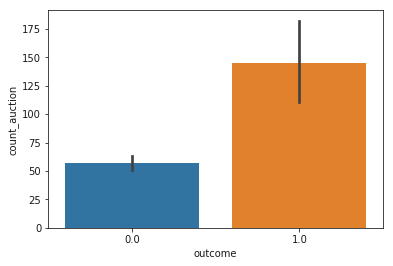

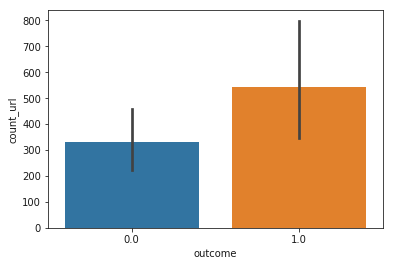

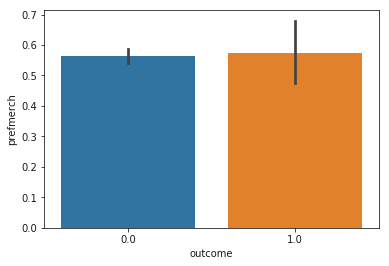

In [151]:
list2anz = ['count_bid_id','count_device','count_country', 'count_ip', 'count_merchandise', 'count_auction','count_url','prefmerch']

for col in list2anz:
    sns.barplot(data=train2_merged,y=col,x="outcome")
    plt.show()

In [32]:
# Create X and y 
selected_features=["bidder_id","payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url']

selected_features=["bidder_id","payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_auction','count_url','prefmerch']

selected_features=["payment_account","address",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url','prefmerch']

selected_features=['count_bid_id',"payment_account",'count_device',
       'count_country', 'count_ip', 'count_merchandise', 'count_auction',
       'count_url','prefmerch']

y = train2_merged["outcome"]
X = train2_merged[selected_features]

# Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [33]:
# # Logistic Regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
log1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1409
Model:                            GLM   Df Residuals:                     1399
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.24
Date:                Tue, 10 Dec 2019   Deviance:                       546.49
Time:                        10:09:55   Pearson chi2:                 1.34e+03
No. Iterations:                    22   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.4416   1.66e+04     -0.001      0.999   -3.25e+04    3.24e+04
count_bid_id         -0.0001   6.09e-05     -1.645      0.100      -0.000    1.92e-05
payment_account      -0.0001      0.000     -0.582      0.561      -0.001       0.000
count_device          0.0008      0.002      0.425      0.671      -0.003       0.004
count_country         0.0008      0.009      0.089      0.929      -0.017       0.019
count_ip              0.0002      0.000      1.781      0.075   -1.93e-05       0.000
count_merchandise    20.5173   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
count_auction         0.0027      0.001      1.845      0.065      -0.000       0.006
count_url            -0.0002      0.000     -1.423      0.155      -0.000    6.49e-05
prefmerch            -0.2297      0.249     -0.922      0.357      -0.718       0.259
=====================================================================================
"""

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [154]:
y_train_pred_final = pd.DataFrame({'Outcome':y_train.values, 'Outcome_Prob':y_train_pred})
y_train_pred_final['bidder_id'] = y_train.index
y_train_pred_final.head()

,Outcome,Outcome_Prob,bidder_id
0,0.0,0.038961,1962
1,0.0,0.045151,883
2,0.0,0.049806,1432
3,0.0,0.037778,210
4,0.0,0.058938,376


In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Outcome, y_train_pred_final.Outcome_Prob, drop_intermediate = False )

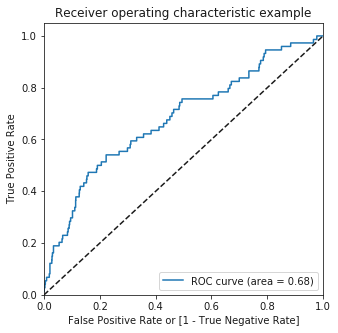

In [156]:
draw_roc(y_train_pred_final.Outcome, y_train_pred_final.Outcome_Prob)

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Outcome_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Outcome,Outcome_Prob,bidder_id,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,0.3,0.35,0.4
0,0.0,0.038961,1962,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.045151,883,1,1,1,1,0,0,0,0,0,0,0,0,0
2,0.0,0.049806,1432,1,1,1,1,0,0,0,0,0,0,0,0,0
3,0.0,0.037778,210,1,1,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.058938,376,1,1,1,1,1,0,0,0,0,0,0,0,0


In [158]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
numbers = [0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65]
numbers = [0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
numbers = [0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.20,0.25,0.30,0.35,0.40]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Outcome, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.01  0.01  0.072392  1.000000  0.020974
0.02  0.02  0.073811  1.000000  0.022472
0.03  0.03  0.073101  0.986486  0.022472
0.04  0.04  0.396026  0.783784  0.374532
0.05  0.05  0.750177  0.540541  0.761798
0.06  0.06  0.848119  0.405405  0.872659
0.10  0.10  0.913414  0.189189  0.953558
0.15  0.15  0.931867  0.081081  0.979026
0.20  0.20  0.939674  0.067568  0.988015
0.25  0.25  0.944642  0.054054  0.994007
0.30  0.30  0.945351  0.040541  0.995506
0.35  0.35  0.946771  0.040541  0.997004
0.40  0.40  0.946771  0.027027  0.997753


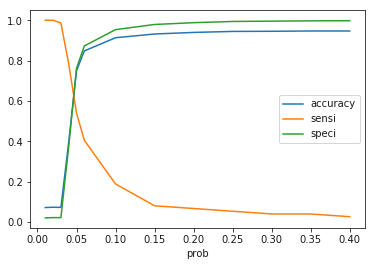

In [159]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [160]:
y_train_pred_final["final_predicted"]= y_train_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.055 else 0)
y_train_pred_final

,Outcome,Outcome_Prob,bidder_id,0.01,0.02,0.03,0.04,0.05,0.06,0.1,0.15,0.2,0.25,0.3,0.35,0.4,final_predicted
0,0.0,3.896145e-02,1962,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0.0,4.515053e-02,883,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0.0,4.980562e-02,1432,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,0.0,3.777834e-02,210,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,5.893820e-02,376,1,1,1,1,1,0,0,0,0,0,0,0,0,1
5,0.0,4.272491e-02,1581,1,1,1,1,0,0,0,0,0,0,0,0,0,0
6,0.0,3.458905e-02,1016,1,1,1,0,0,0,0,0,0,0,0,0,0,0
7,0.0,6.557499e-02,2004,1,1,1,1,1,1,0,0,0,0,0,0,0,1
8,0.0,3.266474e-02,711,1,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0.0,3.809600e-02,1672,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [161]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Outcome, y_train_pred_final.final_predicted )
confusion2

array([[1125,  210],
       [  40,   34]], dtype=int64)

In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting CustID to index
y_test_df['bidder_id'] = y_test_df.index

In [164]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1920    0.047488
1803    0.034880
75      0.043124
629     0.050051
1543    0.046000
785     0.073889
1935    0.050390
23      0.049760
1434    0.035651
492     0.041049
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [166]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Outcome_Prob'})

In [169]:
# Rearranging the columns
# y_pred_final = y_pred_final.reindex_axis(['bidder_id','outcome','Outcome_Prob'], axis=1)
y_pred_final = y_pred_final.reindex(['bidder_id','outcome','Outcome_Prob'], axis=1)
y_pred_final.head()

,bidder_id,outcome,Outcome_Prob
0,1920,0.0,0.047488
1,1803,0.0,0.034880
2,75,0.0,0.043124
3,629,0.0,0.050051
4,1543,0.0,0.046000


In [170]:
y_pred_final['final_predicted'] = y_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.055 else 0)
y_pred_final.head()

,bidder_id,outcome,Outcome_Prob,final_predicted
0,1920,0.0,0.047488,0
1,1803,0.0,0.034880,0
2,75,0.0,0.043124,0
3,629,0.0,0.050051,0
4,1543,0.0,0.046000,0


In [171]:
y_pred_final[y_pred_final["outcome"]==1].head()

,bidder_id,outcome,Outcome_Prob,final_predicted
19,1523,1.0,0.044257,0
163,1534,1.0,0.036364,0
208,777,1.0,0.047551,0
235,1198,1.0,0.052140,0
240,719,1.0,0.051891,0


In [172]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.outcome, y_pred_final.final_predicted)

0.8013245033112583

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.outcome, y_pred_final.final_predicted )
confusion2

array([[475, 100],
       [ 20,   9]], dtype=int64)

#### Prediction

In [174]:
# X_test_sm.head()
X = test2_merged[selected_features]
X_test_sm = sm.add_constant(X)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

0    0.038015
1    0.027954
2    0.036832
3    0.048564
4    0.041439
5    0.046039
6    0.039329
7    0.064246
8    0.026955
9    0.046968
dtype: float64

In [175]:
# test_merged["pred_prob"]=y_test_pred
test_merged2["pred_prob"]=y_test_pred
# temp = test_merged.drop_duplicates(subset=["bidder_id"],keep="first")
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832,0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439,0


In [176]:
len(test_merged2)

4700

In [177]:
test_merged2['prediction'] = test_merged2["pred_prob"].map(lambda x: 1 if x > 0.055 else 0)
test_merged2.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832,0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439,0


In [178]:
temp = test_merged2.drop_duplicates(subset=["bidder_id"],keep="first")
temp.head()

,bidder_id,payment_account,address,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch,pred_prob,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c,4.0,2.0,3.0,4.0,1.0,3.0,3.0,0,0.038015,0
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1,0.027954,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0,17.0,4.0,3.0,4.0,1.0,14.0,2.0,1,0.036832,0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat,148.0,81.0,14.0,129.0,1.0,90.0,80.0,0,0.048564,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa,23.0,17.0,2.0,17.0,1.0,20.0,1.0,0,0.041439,0


In [180]:
temp[["bidder_id","prediction"]].head()

,bidder_id,prediction
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,0
1,a921612b85a1494456e74c09393ccb65ylp4y,0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,0
3,eaf0ed0afc9689779417274b4791726cn5udi,0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,0


In [181]:
test_merged2['prediction'].value_counts()
temp['prediction'].value_counts()

0    4121
1     579
Name: prediction, dtype: int64

In [182]:
# Import relevant libraries
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

classifiers = [LogisticRegression(solver="lbfgs")]
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [183]:
acc_dict = {}

for clf in classifiers:
        name = clf.__class__.__name__
          
        clf.fit(X_train[selected_features],y_train)
        predict=clf.predict(X_test[selected_features])
        acc=accuracy_score(y_test,predict)

        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc
            
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()

In [184]:
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print(round(accuracy_score(y_test,y_pred),2))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.95
[[575   0]
 [ 29   0]]
0.0
0.0


C:\Users\Niks\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [185]:
test.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [186]:
X_test.head()

,count_bid_id,payment_account,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
1920,20.0,1000,11.0,2.0,17.0,1.0,13.0,2.0,0
1803,2.0,1448,2.0,2.0,2.0,1.0,2.0,1.0,1
75,1.0,1485,1.0,1.0,1.0,1.0,1.0,1.0,0
629,225.0,3,90.0,23.0,124.0,1.0,44.0,3.0,1
1543,1.0,926,1.0,1.0,1.0,1.0,1.0,1.0,0


In [187]:
selected_features

['count_bid_id',
 'payment_account',
 'count_device',
 'count_country',
 'count_ip',
 'count_merchandise',
 'count_auction',
 'count_url',
 'prefmerch']

In [188]:
test2_merged[selected_features].head()

,count_bid_id,payment_account,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,prefmerch
0,4.0,2637,2.0,3.0,4.0,1.0,3.0,3.0,0
1,3.0,3344,3.0,2.0,2.0,1.0,2.0,1.0,1
2,17.0,1259,4.0,3.0,4.0,1.0,14.0,2.0,1
3,148.0,3037,81.0,14.0,129.0,1.0,90.0,80.0,0
4,23.0,2375,17.0,2.0,17.0,1.0,20.0,1.0,0


In [189]:
y_predict=dtc.predict(test2_merged[selected_features])

In [190]:
bidder_id = test["bidder_id"]

temp = pd.DataFrame(pd.DataFrame({
        "bidder_id": bidder_id,
        "prediction": y_predict
    }))


temp.to_csv(r"C:\Users\Niks\Downloads\kaggle2 Facebook bot vs Human\Finalsubmission.csv", index = False)

In [191]:
temp['prediction'].value_counts()

0.0    4493
1.0     207
Name: prediction, dtype: int64